In [84]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [93]:
df = yf.download('BTC-USD', start = "2024-11-01", end = "2024-12-04", interval="15m")

[*********************100%***********************]  1 of 1 completed


In [94]:
df['Body'] = abs(df['Close'] - df['Open'])

(array([2.015e+03, 7.660e+02, 2.250e+02, 9.000e+01, 3.800e+01, 1.600e+01,
        8.000e+00, 7.000e+00, 1.000e+00, 2.000e+00]),
 array([2.34375000e-02, 1.64317969e+02, 3.28612500e+02, 4.92907031e+02,
        6.57201563e+02, 8.21496094e+02, 9.85790625e+02, 1.15008516e+03,
        1.31437969e+03, 1.47867422e+03, 1.64296875e+03]),
 <BarContainer object of 10 artists>)

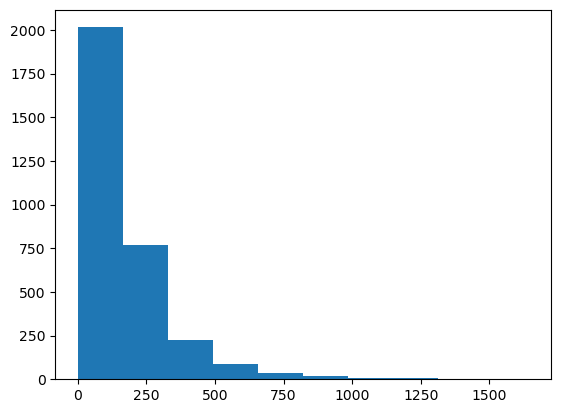

In [95]:
plt.hist(df['Body'])

In [96]:
df

,Open,High,Low,Close,Adj Close,Volume,Body
Datetime,,,,,,,
2024-11-01 00:00:00,70202.875000,70324.890625,70202.875000,70320.242188,70320.242188,27385856,117.367188
2024-11-01 00:15:00,70347.687500,70362.109375,70290.953125,70321.875000,70321.875000,41615360,25.812500
2024-11-01 00:30:00,70328.093750,70328.093750,70100.710938,70173.078125,70173.078125,29069312,155.015625
2024-11-01 00:45:00,70154.625000,70246.078125,70116.695312,70116.695312,70116.695312,0,37.929688
2024-11-01 01:00:00,70090.023438,70190.882812,70080.945312,70190.882812,70190.882812,12984320,100.859375
...,...,...,...,...,...,...,...
2024-12-03 22:45:00,95926.898438,96192.726562,95863.773438,96192.726562,96192.726562,115748864,265.828125
2024-12-03 23:00:00,96166.312500,96166.312500,95955.320312,96012.335938,96012.335938,64294912,153.976562
2024-12-03 23:15:00,96008.484375,96101.570312,95913.687500,95913.687500,95913.687500,71962624,94.796875


In [97]:
def find_percentile(arr, number):
    # Sort the array
    arr.sort()

    # Count numbers less than or equal to the given number
    count = sum(1 for x in arr if x <= number)

    # Calculate the percentile
    percentile = (count / len(arr)) * 100
    return percentile


body_series = df['Body']
datetime_value_pairs = list(body_series.items())
body_list = body_series.to_list()

In [99]:
for pair in datetime_value_pairs:
    date = pair[0]
    num = pair[1]
    
    if find_percentile(body_list, num) > 99:
        print(date, num)

2024-11-01 15:30:00 977.28125
2024-11-05 19:45:00 1151.25
2024-11-06 02:15:00 1121.6796875
2024-11-06 14:45:00 903.9140625
2024-11-10 04:45:00 1243.0
2024-11-11 20:00:00 934.25
2024-11-11 21:15:00 1047.6328125
2024-11-11 22:45:00 862.5390625
2024-11-11 23:00:00 1155.5234375
2024-11-12 00:00:00 824.390625
2024-11-12 00:45:00 843.0
2024-11-12 10:30:00 1041.8515625
2024-11-13 14:30:00 999.4140625
2024-11-13 16:30:00 1237.2109375
2024-11-13 19:00:00 1637.2421875
2024-11-13 19:30:00 1012.0703125
2024-11-13 20:45:00 1237.1953125
2024-11-13 21:00:00 948.4453125
2024-11-13 22:00:00 933.8203125
2024-11-14 14:30:00 1642.96875
2024-11-14 20:00:00 1181.359375
2024-11-15 00:00:00 918.8984375
2024-11-15 19:30:00 835.1171875
2024-11-18 15:30:00 1392.0625
2024-11-18 20:15:00 1282.296875
2024-11-21 04:00:00 985.40625
2024-11-25 22:45:00 1071.53125
2024-11-26 00:15:00 846.7578125
2024-11-26 14:30:00 895.0234375
2024-11-26 16:15:00 1082.9765625
2024-11-27 15:30:00 1065.03125
2024-12-03 13:45:00 846.78125